In [1]:
%pylab inline
import sys 
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sympy import *

Populating the interactive namespace from numpy and matplotlib


## Create data toy

In [34]:
nb_obj = 1000

x_single = np.linspace(-5,5,100)
x = np.resize(x_single,(3,len(x_single)))

### Gaussian curves

In [35]:
def fun_gauss(x,mu,sigma):
    y_out =  np.exp( - (x - mu)**2 / (2 * sigma**2))
    return y_out


mu = random.uniform(-2, 2, nb_obj)
sigma = random.uniform(0, 2, nb_obj)

y_gauss = []
for i in range(nb_obj):
    shape = fun_gauss(x_single,mu[i],sigma[i])
    if choice([1,0])==1:
        y_gauss.append(-shape)
    else :
        y_gauss.append(shape)

### Double step functions

In [36]:
width = random.uniform(1, 1.5, nb_obj)
width2 = random.uniform(1, 1.5, nb_obj)
start = random.uniform(-5, 2, nb_obj)
height = random.uniform(-3, 3, nb_obj)
height2 = random.uniform(-3, 3, nb_obj)

y_step = []
for i in range(nb_obj):
    temporary = []
    for j in x_single:
        
        if start[i]<j<start[i]+width[i]:
            temporary.append(height[i])
        elif start[i]+width[i]<j<start[i]+width[i]+width2[i]:
            temporary.append(height2[i])
        else :
            temporary.append(0)
    y_step.append(temporary)

### Line functions

In [37]:
a = random.uniform(-2,2, nb_obj)
b = random.uniform(0, 2, nb_obj)

y_line = []
for i in range(nb_obj):
    y_line.append(a[i]*x_single+b[i])

## Plot random toys 

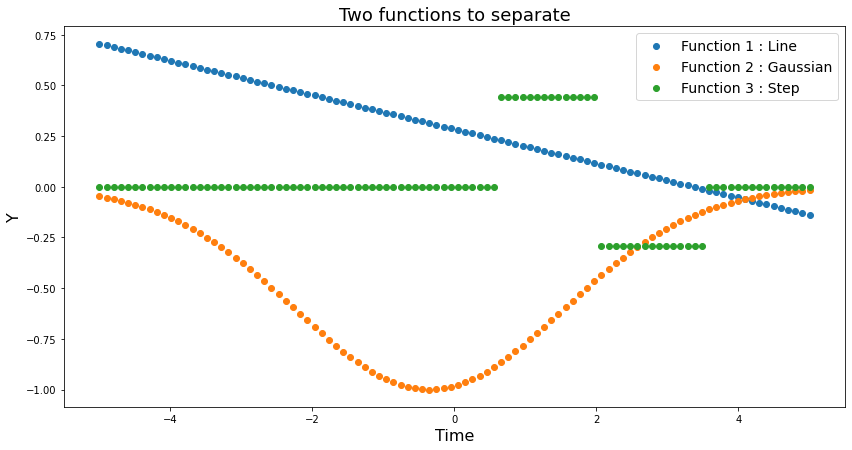

In [38]:
show = randint(0,nb_obj)

plt.figure(figsize=(14,7))

plt.scatter(x_single,y_line[show],label='Function 1 : Line')
plt.scatter(x_single,y_gauss[show],label='Function 2 : Gaussian')
plt.scatter(x_single,y_step[show],label='Function 3 : Step')


plt.title('Two functions to separate',fontsize = 18)
plt.xlabel('Time',fontsize = 16)
plt.ylabel('Y',fontsize = 16)
plt.legend(fontsize = 14)
plt.pause(1)

## Feature extraction
### Compute standard deviation and mean of each toy

In [39]:
std_gauss = np.std(y_gauss,axis=1)
mean_gauss = np.mean(y_gauss,axis=1)

std_line = np.std(y_line,axis=1)
mean_line = np.mean(y_line,axis=1)

std_step = np.std(y_step,axis=1)
mean_step = np.mean(y_step,axis=1)

### Plot the parameter space

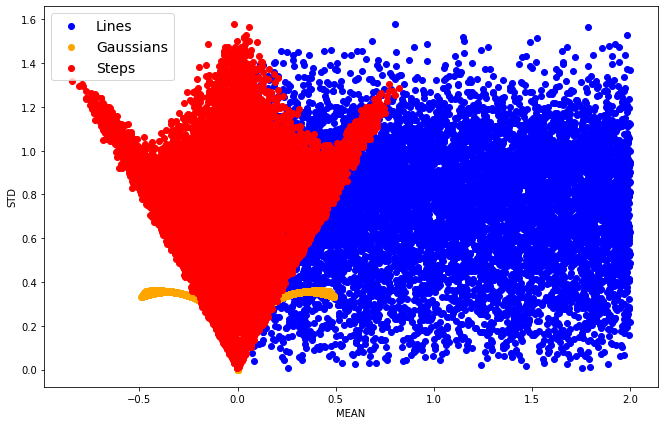

In [40]:
plt.figure(figsize=(11,7))

plt.scatter(mean_line,std_step,label = 'Lines',c='blue')
plt.scatter(mean_gauss,std_gauss,label = 'Gaussians',c='orange')
plt.scatter(mean_step,std_step,label = 'Steps',c='red')

plt.xlabel('MEAN')
plt.ylabel('STD')
plt.legend(fontsize = 14)

## Prepare the data for genetic evolution

### Choose an attractor goal value for each type of object

In [41]:
goalline= 10
goalgauss= -10
goalstep=0

labelline = ['Line']*len(std_line)
labelgauss = ['Gaussian']*len(std_gauss)
labelstep = ['Step']*len(std_step)

dic_classes = {labelline[0]:goalline, labelgauss[0]:goalgauss, labelstep[0]:goalstep}
dic_classes

{'Line': 10, 'Gaussian': -10, 'Step': 0}

### Create the data frame

In [42]:
data = pd.DataFrame(data = {'STD': list(std_line)+list(std_gauss)+list(std_step),
                            'MEAN': list(mean_line)+list(mean_gauss)+list(mean_step),
                            'TARGET': labelline+labelgauss+labelstep})


# Then split it into train and test samples
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,['MEAN','STD']], data.loc[:,'TARGET'], test_size=0.30, random_state=42)

data.head()

,STD,MEAN,TARGET
0,5.548560,1.172098,Line
1,3.947758,0.432027,Line
2,3.626267,0.353775,Line
3,3.869528,1.339099,Line
4,0.891893,1.536106,Line


## Evolve towards ideal function

In [43]:
#Import evolution scripts
sys.path.append(os.path.abspath('../Scripts'))
from create_model import *

### Choose the parameters 

In [46]:
features = X_train
classes = y_train

save = 'Saves/toy_example2'
population_size=500
generations=150

### Create your function

In [47]:
model = evolve(features, classes, dic_classes, save, population_size=population_size, generations=generations)

# Print the mathematical equation of the function
sympify((str(model._program)), locals=converter)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    14.27          21.5211        3          5.51601          5.35619      2.99m
   1     8.37          7.52524       25          4.80975          4.79205      2.07m
   2    11.90           6.7236       24          4.29312           4.2779      2.18m
   3    17.32          6.22115       37          4.20059           4.1355      2.54m
   4    22.26          5.73612       33          4.09124          4.09255      3.13m
   5    23.62          5.72425       43          3.91266          3.96618      3.42m
   6    26.05          7.96193       61          3.67019          3.67721      3.78m
   7    28.17          5.60615       30          3.58841          3.62026      4.39m
   8    29.47          5.60662       36          3.30901          3.32217  

  94    56.90           3.6488       61          2.24411           2.2287      4.68m
  95    56.84          3.78713       59          2.25255          2.36809      4.60m
  96    57.52          3.62283       58          2.24618          2.44806      4.64m
  97    56.05          3.62495       86          2.22471          2.14201      4.47m
  98    56.59          3.56715       58           2.2503            2.411      4.40m
  99    57.87          3.57622       75          2.21819          2.21348      4.41m
 100    57.22          3.65336       58          2.25283          2.38821      4.15m
 101    57.69          3.43568       58          2.25333           2.3837      4.22m
 102    56.73          3.63279       58          2.25016           2.4123      3.97m
 103    55.55          3.81388       58          2.24138          2.49131      3.88m
 104    57.07          3.78822       58          2.25302          2.38648      3.92m
 105    56.92          3.99668       58          2.24524         

MEAN + STD + sin(1/STD) - cos(MEAN) + cos(1/STD) + 2*cos(cos(1/STD)/STD) + 2*cos(cos(1/(0.667 - STD))/STD) + cos(1/(0.667 - STD)) - 2*cos(MEAN + STD) - cos(STD - 0.593) - 0.925

NB : A save of this function is created in a .pkl file

## Analyse the performance of the model

In [48]:
# Import the plotting scripts
sys.path.append(os.path.abspath('../Scripts'))
from plot import *

### Choose parameters

In [49]:
# For the dictionary, we simply reverse the previous one
dic_goals = {v: k for k, v in dic_classes.items()}

function = model
classes = y_test
features = X_test

### Scatter plots :

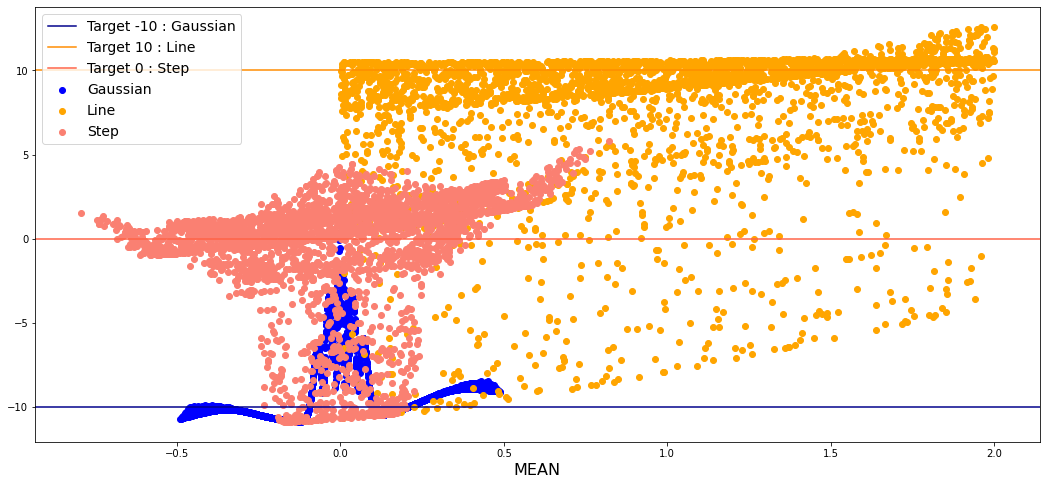

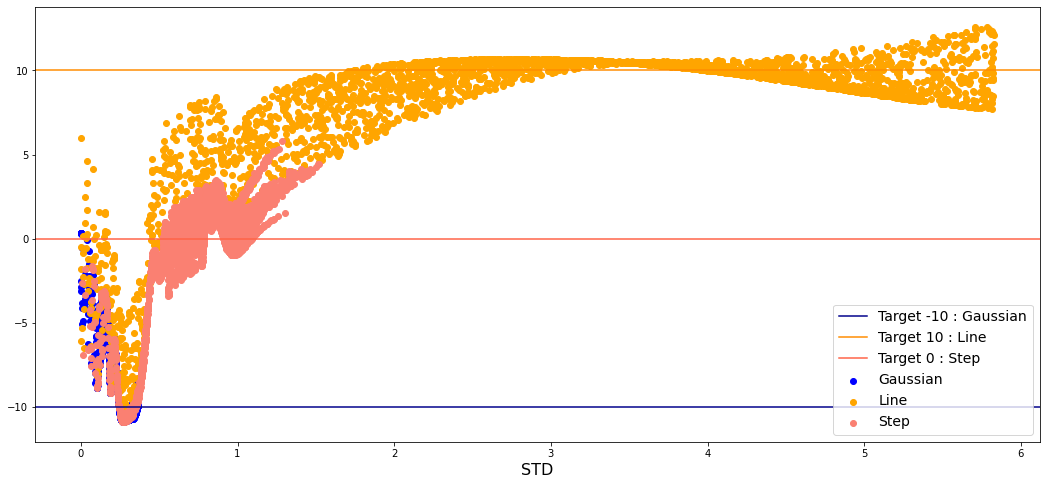

In [50]:
for i in ['MEAN','STD']:

    plt.figure(figsize=(18,8))
    plt.xlabel(i,size = 16)
    scatter_plot(function,features,i,dic_goals,classes=classes)
    plt.legend(fontsize = 14)

### Histogram plot :

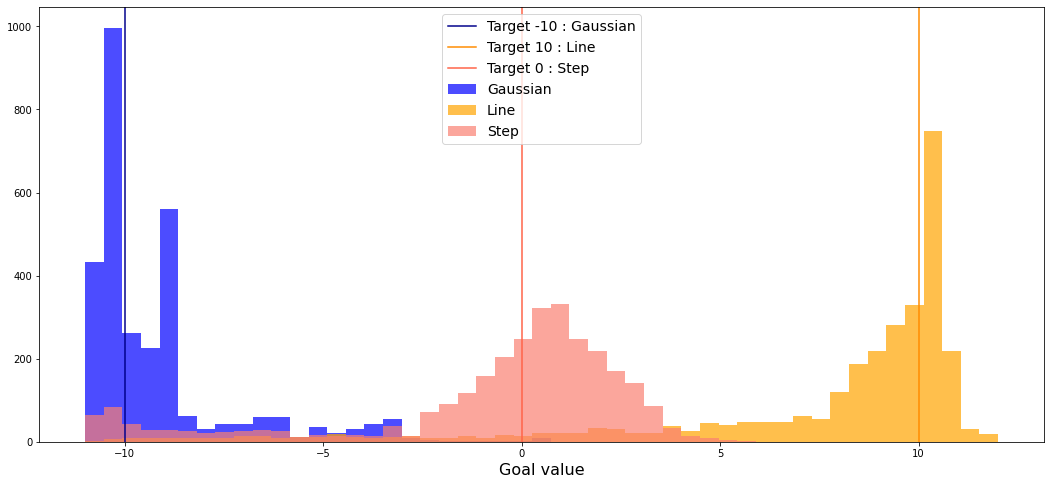

In [60]:
bins = np.linspace(-11,12,50)

plt.figure(figsize=(18,8))
plt.xlabel('Goal value',size = 16)
histo_plot(function,features,dic_goals,bins,classes = classes, alpha = 0.7)
plt.legend(fontsize = 14)